In [766]:
import pandas as pd
df = pd.read_csv("fake_and_real_news_dataset.csv")
df

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
...,...,...,...,...
4589,ukZm6JTO#x,Russia Calls the War Party's Bluff,License DMCA \nCold War 2.0 has reached unprec...,FAKE
4590,yu0xKEiapJ,Bernie Sanders: The Democratic primary gave me...,Print \nSen. Bernie Sanders laid out the ways ...,FAKE
4591,c4Y370E_9c,"Pipeline Police Strip Search Native Girl, Then...",As the pressure to start construction on the D...,FAKE
4592,bBbeuCUeMH,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,FAKE


In [767]:
df['label'].value_counts()

label
REAL    2297
FAKE    2297
Name: count, dtype: int64

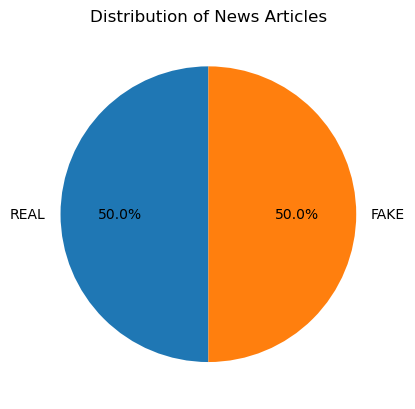

In [768]:
import matplotlib.pyplot as plt
class_counts = df['label'].value_counts()
plt.figure()
plt.pie(class_counts,
        labels=class_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Distribution of News Articles")
plt.show()

In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idd     4594 non-null   object
 1   title   4593 non-null   object
 2   text    4594 non-null   object
 3   label   4594 non-null   object
dtypes: object(4)
memory usage: 143.7+ KB


In [770]:
df['text'].isnull().sum()

np.int64(0)

In [771]:
df.duplicated().sum()


np.int64(0)

In [772]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [773]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

In [774]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,UPDATE: Gov. Fallin vetoed the bill on Friday....,update gov fallin vetoed bill friday head lawm...
1,Ever since Texas laws closed about half of the...,ever since texas laws closed half state aborti...
2,"Donald Trump and Hillary Clinton, now at the s...",donald trump hillary clinton starting line gen...
3,A Houston grand jury investigating criminal al...,houston grand jury investigating criminal alle...
4,WASHINGTON -- Forty-three years after the Supr...,washington forty three years supreme court est...


In [775]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']
X.shape

(4594, 5000)

In [776]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((3675, 5000), (919, 5000))

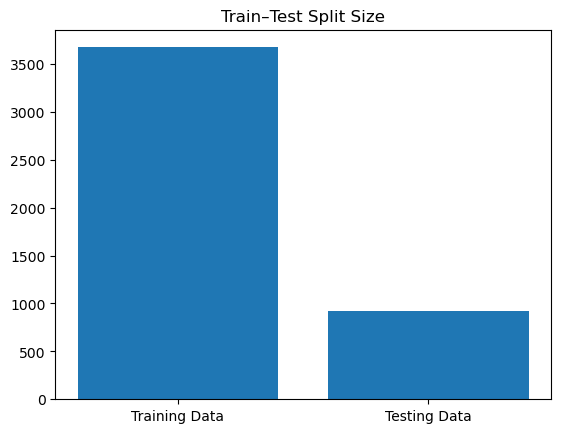

In [777]:
plt.figure()
plt.bar(['Training Data', 'Testing Data'],
        [len(y_train), len(y_test)])
plt.title("Train–Test Split Size")
plt.show()

In [778]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_accuracy

0.9151251360174102

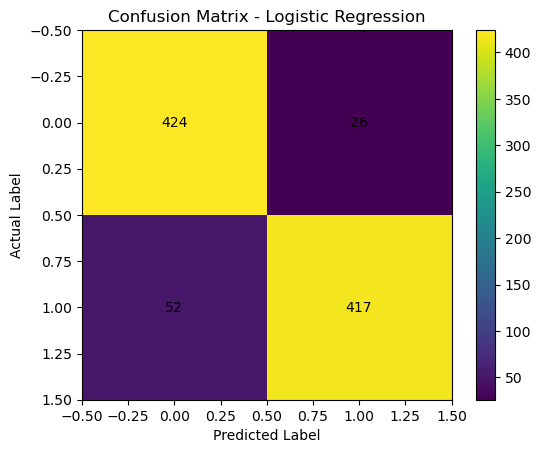

In [779]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

lr_cm = confusion_matrix(y_test, lr_pred)

plt.figure()
plt.imshow(lr_cm)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

for i in range(len(lr_cm)):
    for j in range(len(lr_cm)):
        plt.text(j, i, lr_cm[i, j], ha="center", va="center")

plt.show()


In [780]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_accuracy

0.8835690968443961

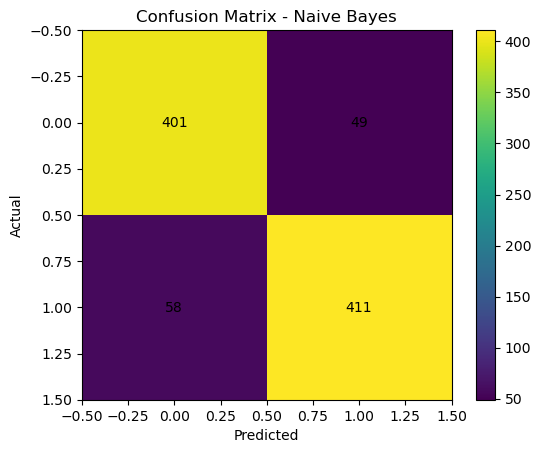

In [781]:
nb_cm = confusion_matrix(y_test, nb_pred)

plt.figure()
plt.imshow(nb_cm)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(len(nb_cm)):
    for j in range(len(nb_cm)):
        plt.text(j, i, nb_cm[i, j], ha="center", va="center")

plt.show()


In [782]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_accuracy

0.926006528835691

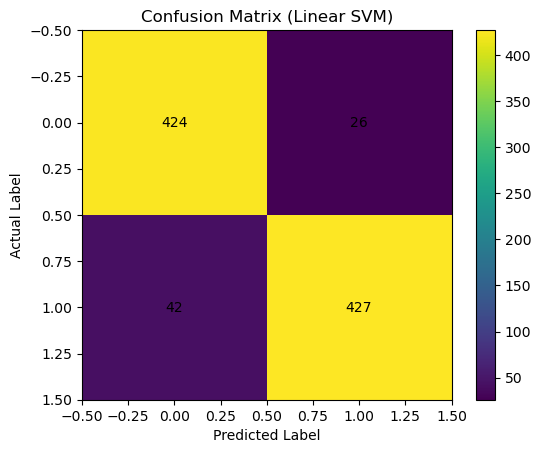

In [783]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix (Linear SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

In [784]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

        FAKE       0.91      0.94      0.93       450
        REAL       0.94      0.91      0.93       469

    accuracy                           0.93       919
   macro avg       0.93      0.93      0.93       919
weighted avg       0.93      0.93      0.93       919



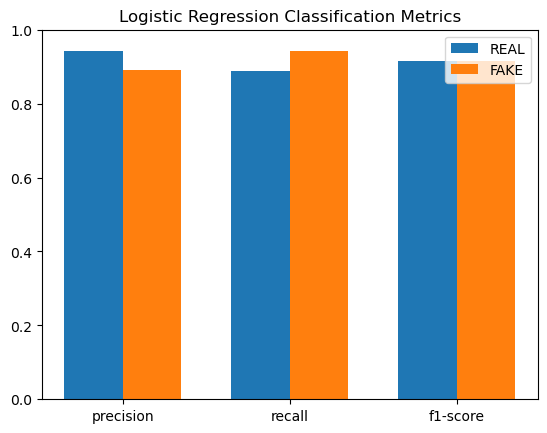

In [785]:
from sklearn.metrics import classification_report
import numpy as np

lr_report = classification_report(y_test, lr_pred, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
lr_real = [lr_report['REAL'][m] for m in metrics]
lr_fake = [lr_report['FAKE'][m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, lr_real, width, label='REAL')
plt.bar(x + width/2, lr_fake, width, label='FAKE')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.title("Logistic Regression Classification Metrics")
plt.legend()
plt.show()


In [786]:
pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Accuracy": [lr_accuracy, nb_accuracy, svm_accuracy]
})


,Model,Accuracy
0,Logistic Regression,0.915125
1,Naive Bayes,0.883569
2,SVM,0.926007


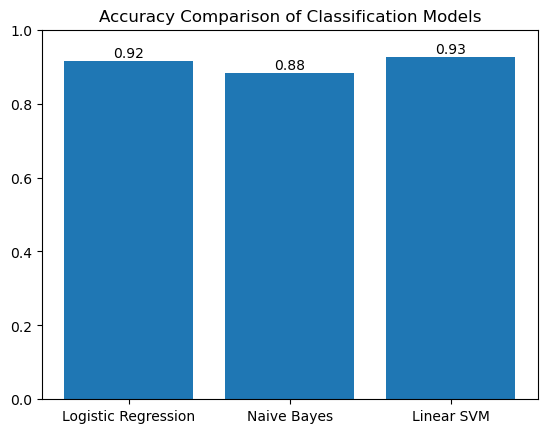

In [787]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'Linear SVM']
accuracies = [lr_accuracy, nb_accuracy, svm_accuracy]

plt.figure()
plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.title("Accuracy Comparison of Classification Models")

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

plt.show()

In [788]:
real_news = df[df['label'] == 'REAL']['text'].iloc[0]

In [789]:
pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Prediction": [
        lr_model.predict(tfidf.transform([clean_text(real_news)]))[0],
        nb_model.predict(tfidf.transform([clean_text(real_news)]))[0],
        svm_model.predict(tfidf.transform([clean_text(real_news)]))[0]
    ]
})

,Model,Prediction
0,Logistic Regression,REAL
1,Naive Bayes,REAL
2,SVM,REAL


In [790]:
fake_news = df[df['label'] == 'FAKE']['text'].iloc[0]

In [791]:
pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Prediction": [
        lr_model.predict(tfidf.transform([clean_text(fake_news)]))[0],
        nb_model.predict(tfidf.transform([clean_text(fake_news)]))[0],
        svm_model.predict(tfidf.transform([clean_text(fake_news)]))[0]
    ]
})

,Model,Prediction
0,Logistic Regression,FAKE
1,Naive Bayes,REAL
2,SVM,FAKE


In [797]:
news = (
"Health experts claim that drinking a special herbal mixture can completely eliminate all viral infections within days."
"According to unnamed insiders, medical authorities are suppressing this information because it would significantly reduce hospital profits."
)
cleaned_news = clean_text(manual_news)
news_vector = tfidf.transform([cleaned_news])

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "Linear SVM"],
    "Prediction": [
        lr_model.predict(news_vector)[0],
        nb_model.predict(news_vector)[0],
        svm_model.predict(news_vector)[0]
    ]
})
comparison_df

,Model,Prediction
0,Logistic Regression,FAKE
1,Naive Bayes,REAL
2,Linear SVM,REAL


In [793]:
final_prediction = comparison_df["Prediction"].mode()[0]
final_prediction
svm_model.predict(news_vector)[0]

'REAL'

outside
real 
"WASHINGTON — The U.S. Department of Labor released new data on Friday showing a steady"
"increase in job creation over the past month. According to the report, gains were"
"recorded in the healthcare and construction sectors, while the national unemployment"
"rate remained unchanged. Economists said the figures suggest moderate economic growth."

WASHINGTON — The National Transportation Safety Board issued a preliminary report on
a recent aviation incident, noting that investigators are continuing to examine
flight data and maintenance records. No final conclusions have been reached at this
stage, officials said.


fake
Scientists have revealed that a hidden signal transmitted through household power
lines can influence human behavior. Anonymous sources claim that governments have
known about this discovery for years but are deliberately hiding the information to
maintain control over the population.

Health experts claim that drinking a special herbal mixture can completely eliminate
all viral infections within days. According to unnamed insiders, medical authorities
are suppressing this information because it would significantly reduce hospital
profits.

In [794]:
real_news_samples = df[df['label'] == 'REAL'].sample(3, random_state=42)

for i, text in enumerate(real_news_samples['text'], 1):
    print(f"\n--- DATASET REAL NEWS {i} ---\n")
    print(text)



--- DATASET REAL NEWS 1 ---

More than two months after Republican presidential front-runner Donald Trump claimed to have raised $6 million for veterans' charities at a fundraiser held on the eve of the Iowa caucuses, most of the organizations targeted to receive the money have gotten less than half of that amount.

The Wall Street Journal, citing a survey of the 22 groups listed by Trump's campaign as prospective recipients for the money, reported that 19 organizations had obtained a total of $2.4 million from Trump's foundation or associates.

Of the three other charities, one declined to disclose how much it had received, another said it needed to submit more paperwork before receiving any money, and the third didn't respond to questions by the Journal.

Fox Business Network first reported in late February that only a fraction of the pledged donations had made their way to the veterans groups.

At the time, FBN reported, several groups said they had not received any money. And seve

In [795]:
fake_news_samples = df[df['label'] == 'FAKE'].sample(2, random_state=42)

for i, text in enumerate(fake_news_samples['text'], 1):
    print(f"\n--- DATASET FAKE NEWS {i} ---\n")
    print(text)



--- DATASET FAKE NEWS 1 ---

0 Add Comment 
THE Nation is still struggling to come to terms the fact an Irishman could ever join a terrorist organisation, several days after Irishman Khalid Kelly allegedly blew himself up in a suicide bomb attack in Iraq. 
Kelly, originally from Dublin, recently lived in Longford and had been fighting for ISIS in Iraq, the news of which shocked communities that previously had no exposure to terrorism or terrorist organisations to their core. 
“You just can’t credit it, can ye, some lad running around with guns and the like. Spouting all sorts of shite about redrawing maps and taking back what is rightfully theirs. Gas all the same,” shared Louth native Trevor Gorman, whose uncle would periodically go up north for something called ‘training’ in the 90s. 
“Look, you’ll just have to give me some time. People in the Middle East are well accustomed to violent loonies hiding behind a religion to commit horrible acts, but this is all new to us, and him being